## Load Fucntion file

In [11]:
%run -i XAI.py


**HIstoric data**

# Give the path to save the results and load files

In [12]:
save_Model = create_folder_to_save('/catboost_tuned')

In [13]:
#save_Model = make_path_to_save(Results,'Extratree')
save_features = make_path_to_save(save_Model,'Features_importance')
saveRCP_45 = make_path_to_save(save_Model,'RCP45')
saveRCP_85 = make_path_to_save(save_Model,'RCP85')

In [24]:
df_historical_climate = Load_df_AI(os.getcwd()+r'/Input/df_AI.csv')
df_historical_climate.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,3149.000000,3149.000000,3149.000000
mean,13.568321,26.482422,17.388114
std,7.639396,7.430151,30.479733
min,-8.800000,0.557143,0.000000
25%,7.057143,20.942857,0.000000
50%,14.159677,27.214286,5.100000
75%,20.900000,32.700000,23.100000
max,25.957143,40.414286,473.400000


In [25]:

skip_rows = 30
base_dir  = os.getcwd()
filename  = r"/Input/Daily_SpringDischarge_SanMarcos.csv"
Approved_date = '2020-11-29'

#- SF-data is springflow data used in the validation through ET & SM-#

df_AI, Sf_data = Load_Springs(df_historical_climate,Approved_date,
                              skip_rows,base_dir,filename)

df_AI.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,3144.000000,3144.000000,3144.000000,3144.000000
mean,13.585542,26.493476,17.396238,4.996305
std,7.632612,7.429954,30.496073,1.871899
min,-8.800000,0.557143,0.000000,1.990286
25%,7.071429,20.942857,0.000000,3.550786
50%,14.200000,27.228571,5.100000,4.639786
75%,20.928571,32.714286,23.150000,6.040536
max,25.957143,40.414286,473.400000,12.759000


## Load the MACA 45

In [26]:
#----------------------------------------
# RCP 4.5 - M4-Tmax; M10-Precip; M17-Tmin
#----------------------------------------

temp = MACA_data_SM(45,'M_18_Japan')

df_MACA_RCP45 = pd.DataFrame()
df_MACA_RCP45[['Date','$T_{max}$ [$^oC$]']] = temp[['Date','Tmax[C]']]
df_MACA_RCP45.index = pd.DatetimeIndex(df_MACA_RCP45['Date'])
df_MACA_RCP45.drop(['Date'],axis=1,inplace=True)


temp =MACA_data_SM(45,'M_18_Japan')
df_MACA_RCP45['$P$ [mm]'] = temp['Precip[mm]'].values


temp = MACA_data_SM(45,'M_4_USA')
df_MACA_RCP45['$T_{min}$ [$^oC$]'] = temp['Tmin[C]'].values


df_RCP45_MACA = pd.DataFrame()
df_RCP45_MACA['$T_{min}$ [$^oC$]'] = df_MACA_RCP45['$T_{min}$ [$^oC$]'].resample('W').mean()
df_RCP45_MACA['$T_{max}$ [$^oC$]'] = df_MACA_RCP45['$T_{max}$ [$^oC$]'].resample('W').mean().values
df_RCP45_MACA['$P$ [mm]'] = df_MACA_RCP45['$P$ [mm]'].resample('W').sum().values
df_RCP45_MACA.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,4906.000000,4906.000000,4906.000000
mean,15.311680,27.562172,18.328250
std,7.595859,7.689294,30.304124
min,-13.247194,1.649962,0.000000
25%,8.967193,21.722520,1.097293
50%,16.249530,28.119324,6.868001
75%,22.411885,33.920475,22.892587
max,27.602197,46.927602,400.595908


## Load the RCP 8.5

In [7]:

#----------------------------------------
# RCP 8.5- M4-Tmax; M10-Precip; M17-Tmin
#----------------------------------------

temp = MACA_data_SM(85,'M_18_Japan')

df_MACA_RCP85 = pd.DataFrame()
df_MACA_RCP85[['Date','$T_{max}$ [$^oC$]']] = temp[['Date','Tmax[C]']]
df_MACA_RCP85.index = pd.DatetimeIndex(df_MACA_RCP85['Date'])
df_MACA_RCP85.drop(['Date'],axis=1,inplace=True)



df_MACA_RCP85['$P$ [mm]']=MACA_data_SM(85,'M_18_Japan')['Precip[mm]'].values



df_MACA_RCP85['$T_{min}$ [$^oC$]']= MACA_data_SM(85,'M_4_USA')['Tmin[C]'].values


df_RCP85_MACA = pd.DataFrame()
df_RCP85_MACA['$T_{min}$ [$^oC$]'] = df_MACA_RCP85['$T_{min}$ [$^oC$]'].resample('W').mean()
df_RCP85_MACA['$T_{max}$ [$^oC$]'] = df_MACA_RCP85['$T_{max}$ [$^oC$]'].resample('W').mean().values
df_RCP85_MACA['$P$ [mm]'] = df_MACA_RCP85['$P$ [mm]'].resample('W').sum().values
df_RCP85_MACA.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,4906.000000,4906.000000,4906.000000
mean,16.317949,28.518329,17.723373
std,7.637849,8.005146,28.827272
min,-5.535311,-2.486796,0.000000
25%,9.987640,22.538566,0.969075
50%,17.270654,29.091135,6.643954
75%,23.415739,34.899279,21.658387
max,29.437982,46.867452,341.637357


# Feature Engineering

In [8]:
# Pumping patterns is hypothesized to be associated with the month
df_AI['Month'] = df_AI.index.month 

# There could be some lag effects in the hydroclimatic behavior for Karst aquifers
df_AI['$T_{max}^{lag1}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(1)
df_AI['$T_{max}^{lag2}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(2)

df_AI['$T_{min}^{lag1}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(1)
df_AI['$T_{min}^{lag2}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(2)

df_AI['$P^{lag1}$ [mm]'] = df_AI['$P$ [mm]'].shift(1)
df_AI['$P^{lag2}$ [mm]'] = df_AI['$P$ [mm]'].shift(2)

df_AI['SF$^{lag1} [m^3/s]$'] = df_AI['SF$[m^3/s]$'].shift(1)
df_AI['SF$^{lag2} [m^3/s]$'] = df_AI['SF$[m^3/s]$'].shift(2)

df_AI.dropna(inplace=True)
df_AI

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$,Month,$T_{max}^{lag1}$ [$^oC$],$T_{max}^{lag2}$ [$^oC$],$T_{min}^{lag1}$ [$^oC$],$T_{min}^{lag2}$ [$^oC$],$P^{lag1}$ [mm],$P^{lag2}$ [mm],SF$^{lag1} [m^3/s]$,SF$^{lag2} [m^3/s]$
DATE,,,,,,,,,,,,,
1960-09-18,15.542857,32.457143,0.000000,5.711571,9,31.900000,32.775000,21.057143,20.850000,23.900000,4.3,5.934429,6.145000
1960-09-25,17.928571,33.485714,0.000000,5.541571,9,32.457143,31.900000,15.542857,21.057143,0.000000,23.9,5.711571,5.934429
1960-10-02,14.442857,29.114286,0.000000,5.372143,10,33.485714,32.457143,17.928571,15.542857,0.000000,0.0,5.541571,5.711571
1960-10-09,16.342857,32.200000,2.100000,5.270857,10,29.114286,33.485714,14.442857,17.928571,0.000000,0.0,5.372143,5.541571
1960-10-16,17.785714,31.600000,82.300000,5.210000,10,32.200000,29.114286,16.342857,14.442857,2.100000,0.0,5.270857,5.372143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,5.100397,20.477551,9.700000,4.562857,11,29.914286,30.242857,18.742857,16.028571,0.500000,3.6,4.292143,3.960286
2020-11-08,7.911714,25.953588,0.000000,4.134000,11,20.477551,29.914286,5.100397,18.742857,9.700000,0.5,4.562857,4.292143
2020-11-15,16.247473,27.681412,0.000000,3.604286,11,25.953588,20.477551,7.911714,5.100397,0.000000,9.7,4.134000,4.562857


In [9]:

Features = ['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
            '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]',
            'SF$^{lag1} [m^3/s]$','SF$^{lag2} [m^3/s]$']

#SpringFlow for Comal = Target
Target = ['SF$[m^3/s]$']

#Create Independent and dependent variable for machine learning
X = df_AI[Features].to_numpy()
Y = df_AI[Target].to_numpy()

#Take the tain set till 2005 and test set from 2006 till 2020
df_AI_Train = df_AI[:'2008-12-31']

df_AI_Test = df_AI['2009-01-01':]


train_X = df_AI_Train[Features].to_numpy()
train_y = df_AI_Train[Target].to_numpy()
test_X = df_AI_Test[Features].iloc[0].to_numpy().reshape(1, -1)


# Essemble tree methods

## Model

In [12]:
from catboost import CatBoostRegressor
%run -i XAI.py


Learning rate set to 0.047381
0:	learn: 1.8163207	total: 47.4ms	remaining: 47.4s
1:	learn: 1.7478020	total: 48.3ms	remaining: 24.1s
2:	learn: 1.6781292	total: 49.6ms	remaining: 16.5s
3:	learn: 1.6161643	total: 51.1ms	remaining: 12.7s
4:	learn: 1.5530376	total: 52.3ms	remaining: 10.4s
5:	learn: 1.4928802	total: 53.3ms	remaining: 8.84s
6:	learn: 1.4336128	total: 54.2ms	remaining: 7.7s
7:	learn: 1.3818035	total: 55.3ms	remaining: 6.86s
8:	learn: 1.3291078	total: 56.5ms	remaining: 6.23s
9:	learn: 1.2770349	total: 57.6ms	remaining: 5.7s
10:	learn: 1.2310836	total: 58.7ms	remaining: 5.28s
11:	learn: 1.1853258	total: 59.8ms	remaining: 4.92s
12:	learn: 1.1403990	total: 60.8ms	remaining: 4.62s
13:	learn: 1.0984963	total: 61.6ms	remaining: 4.34s
14:	learn: 1.0565096	total: 62.7ms	remaining: 4.11s
15:	learn: 1.0181362	total: 63.7ms	remaining: 3.92s
16:	learn: 0.9808806	total: 65.3ms	remaining: 3.77s
17:	learn: 0.9465853	total: 66.3ms	remaining: 3.62s
18:	learn: 0.9147329	total: 67.4ms	remaining: 

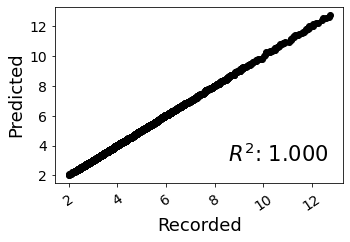

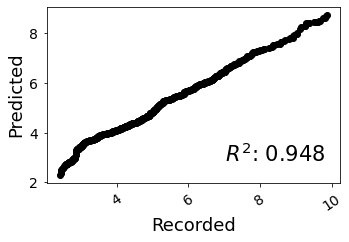

In [13]:

Model = CatBoostRegressor()
Model.fit(train_X, train_y)
print_results(Model, train_X, train_y, save_Model)


In [15]:
df_AI_Test.to_excel(save_Model+"/df_Test.xlsx")

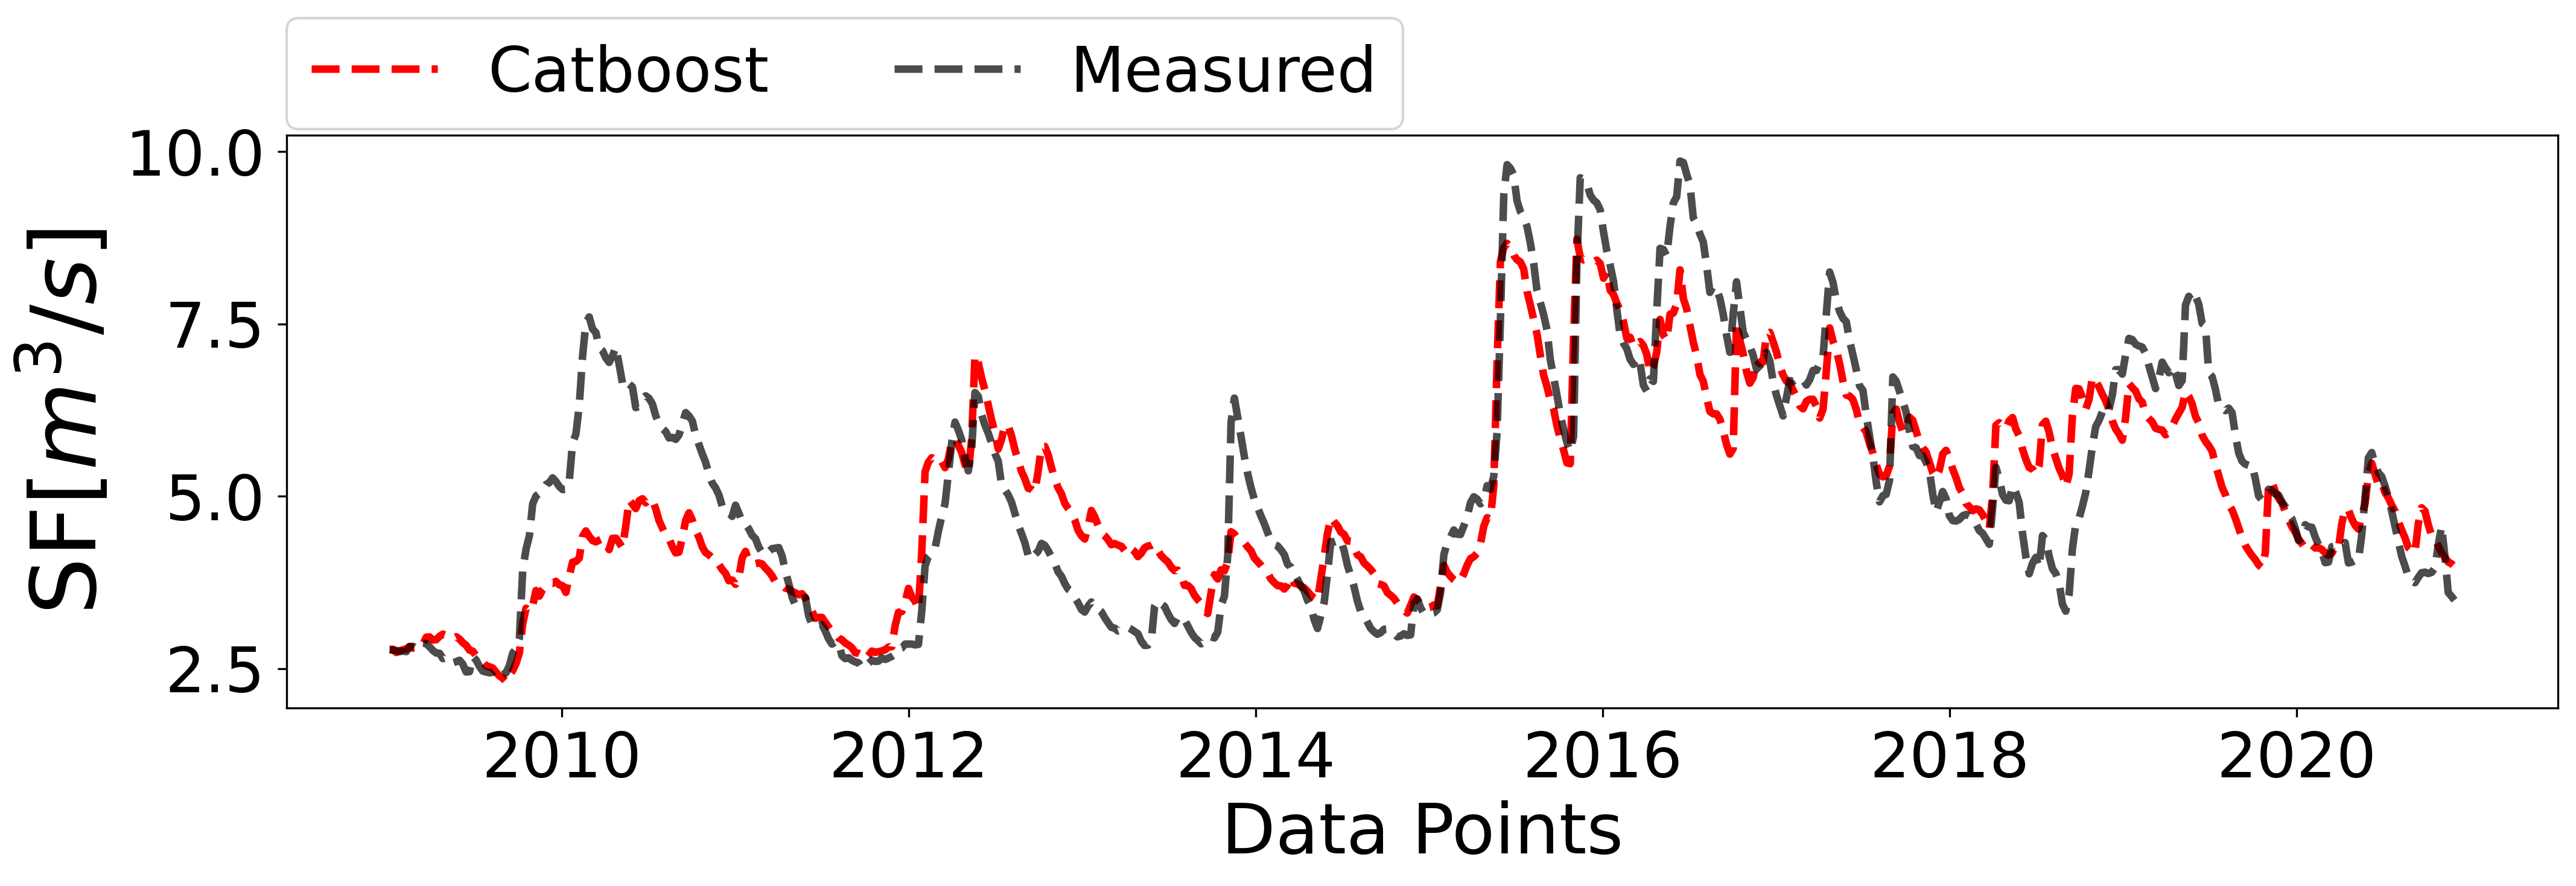

In [16]:
plot_test(df_AI_Test, save_Model, "Catboost")




In [17]:
df_AI.to_excel(save_Model+ str('/df_AI_Spring.xlsx'))


# Shapley Anlysis 

**Shapley Imporatance barplot**

In [18]:
####################################################################
# Update Model SpringFLow Model
####################################################################
#With the whole data from 1960 -2020
Model = Model.fit(X, Y)

explainer = shap.TreeExplainer(Model)
shap_values = explainer.shap_values(df_AI[Features].to_numpy())


Learning rate set to 0.049061
0:	learn: 1.7970832	total: 1.23ms	remaining: 1.23s
1:	learn: 1.7253218	total: 2.32ms	remaining: 1.16s
2:	learn: 1.6531656	total: 3.55ms	remaining: 1.18s
3:	learn: 1.5888475	total: 5.3ms	remaining: 1.32s
4:	learn: 1.5240593	total: 6.33ms	remaining: 1.26s
5:	learn: 1.4623140	total: 7.78ms	remaining: 1.29s
6:	learn: 1.4019953	total: 9.28ms	remaining: 1.32s
7:	learn: 1.3463580	total: 10.8ms	remaining: 1.34s
8:	learn: 1.2934586	total: 12.1ms	remaining: 1.33s
9:	learn: 1.2407385	total: 13.3ms	remaining: 1.31s
10:	learn: 1.1907780	total: 15.8ms	remaining: 1.42s
11:	learn: 1.1444297	total: 17.4ms	remaining: 1.43s
12:	learn: 1.0994399	total: 18.5ms	remaining: 1.4s
13:	learn: 1.0579469	total: 19.6ms	remaining: 1.38s
14:	learn: 1.0158186	total: 20.8ms	remaining: 1.37s
15:	learn: 0.9784308	total: 22.4ms	remaining: 1.37s
16:	learn: 0.9412804	total: 23.6ms	remaining: 1.36s
17:	learn: 0.9052155	total: 24.7ms	remaining: 1.35s
18:	learn: 0.8723410	total: 25.9ms	remaining: 

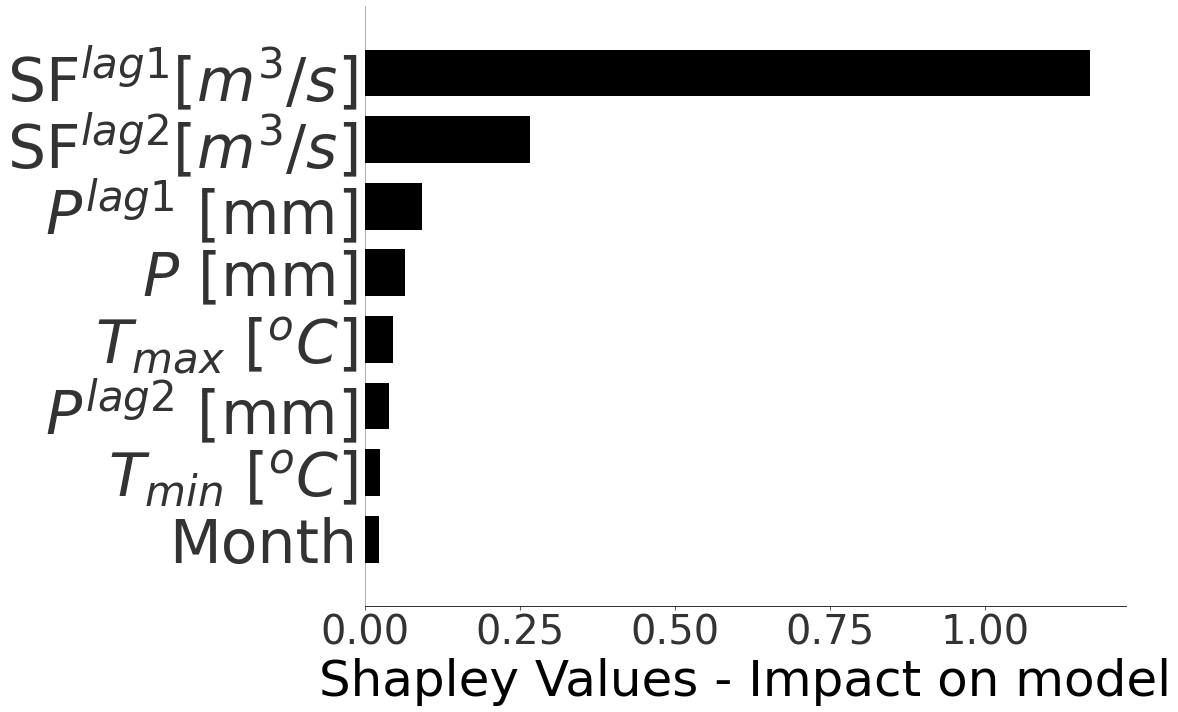

In [19]:

shap.summary_plot(shap_values, df_AI[Features].to_numpy(), 
                  Features, plot_size=(16,10), show=False, 
                  plot_type = "bar", color = "black")
plt.xlabel('Shapley Values - Impact on model', fontsize=50)
plt.tick_params('y',labelsize=60)
plt.tick_params('x',labelsize=40)
plt.tight_layout(pad=1.08)
plt.savefig(save_features + str('/Feature Importances-Hist.jpg'),
            format='jpeg', dpi=300, bbox_inches ='tight')


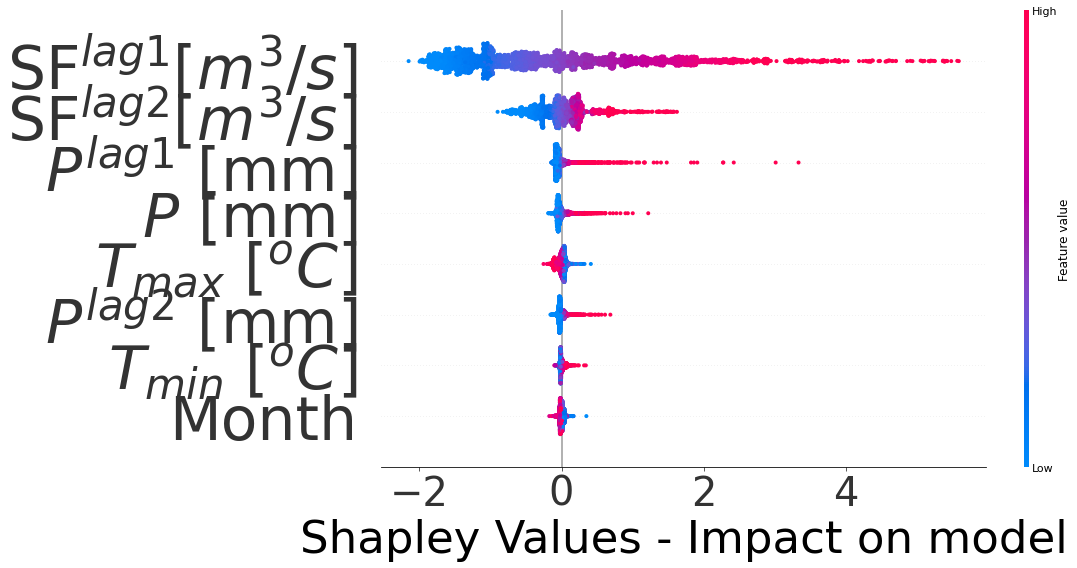

In [20]:
explainer = shap.TreeExplainer(Model)
shap_values = explainer.shap_values(df_AI[Features].to_numpy())

shap.summary_plot(shap_values, df_AI[Features].to_numpy(), 
                      Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=45)
plt.tick_params('y',labelsize=60)
plt.tick_params('x',labelsize=40)
plt.tight_layout(pad=1.08)
plt.savefig(save_features +str('/Feature_Importance-Beeswarm-plot.jpg'), 
                    format='jpeg', dpi=300, bbox_inches ='tight')

**Collage of the top 4 important features according to shapley**

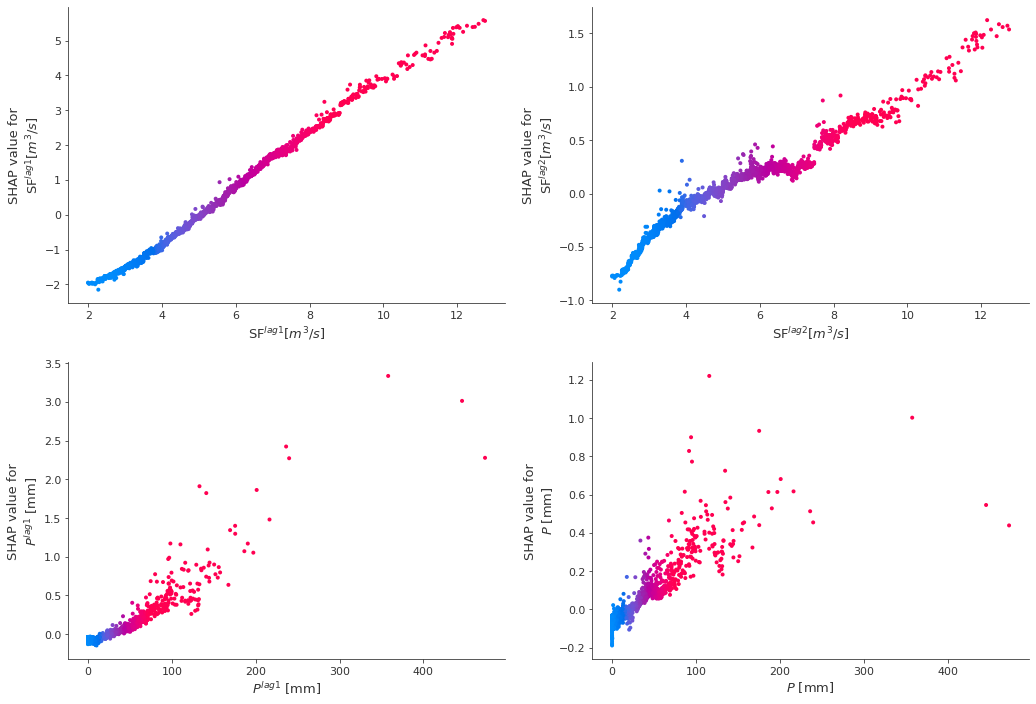

In [21]:
interaction_collage(df_AI,'SF$^{lag1} [m^3/s]$', 
                    '$P^{lag1}$ [mm]',
                    'SF$^{lag2} [m^3/s]$',
                    '$P$ [mm]', save_features)


**Save all feature importance plots**

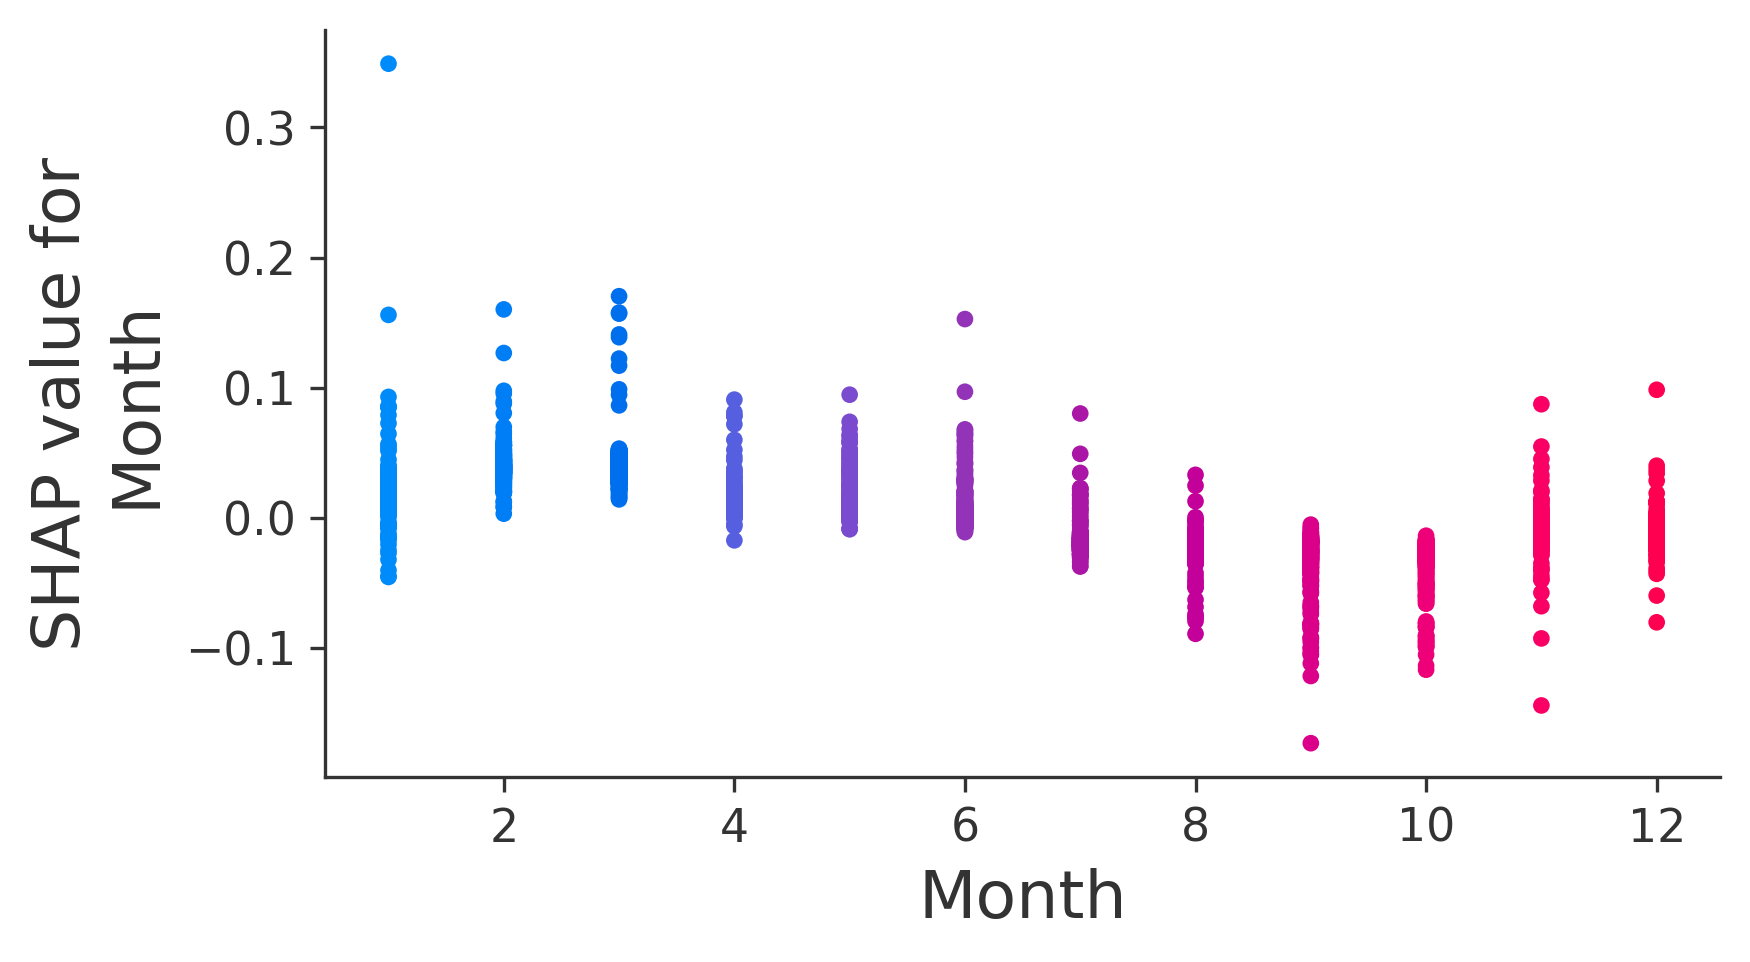

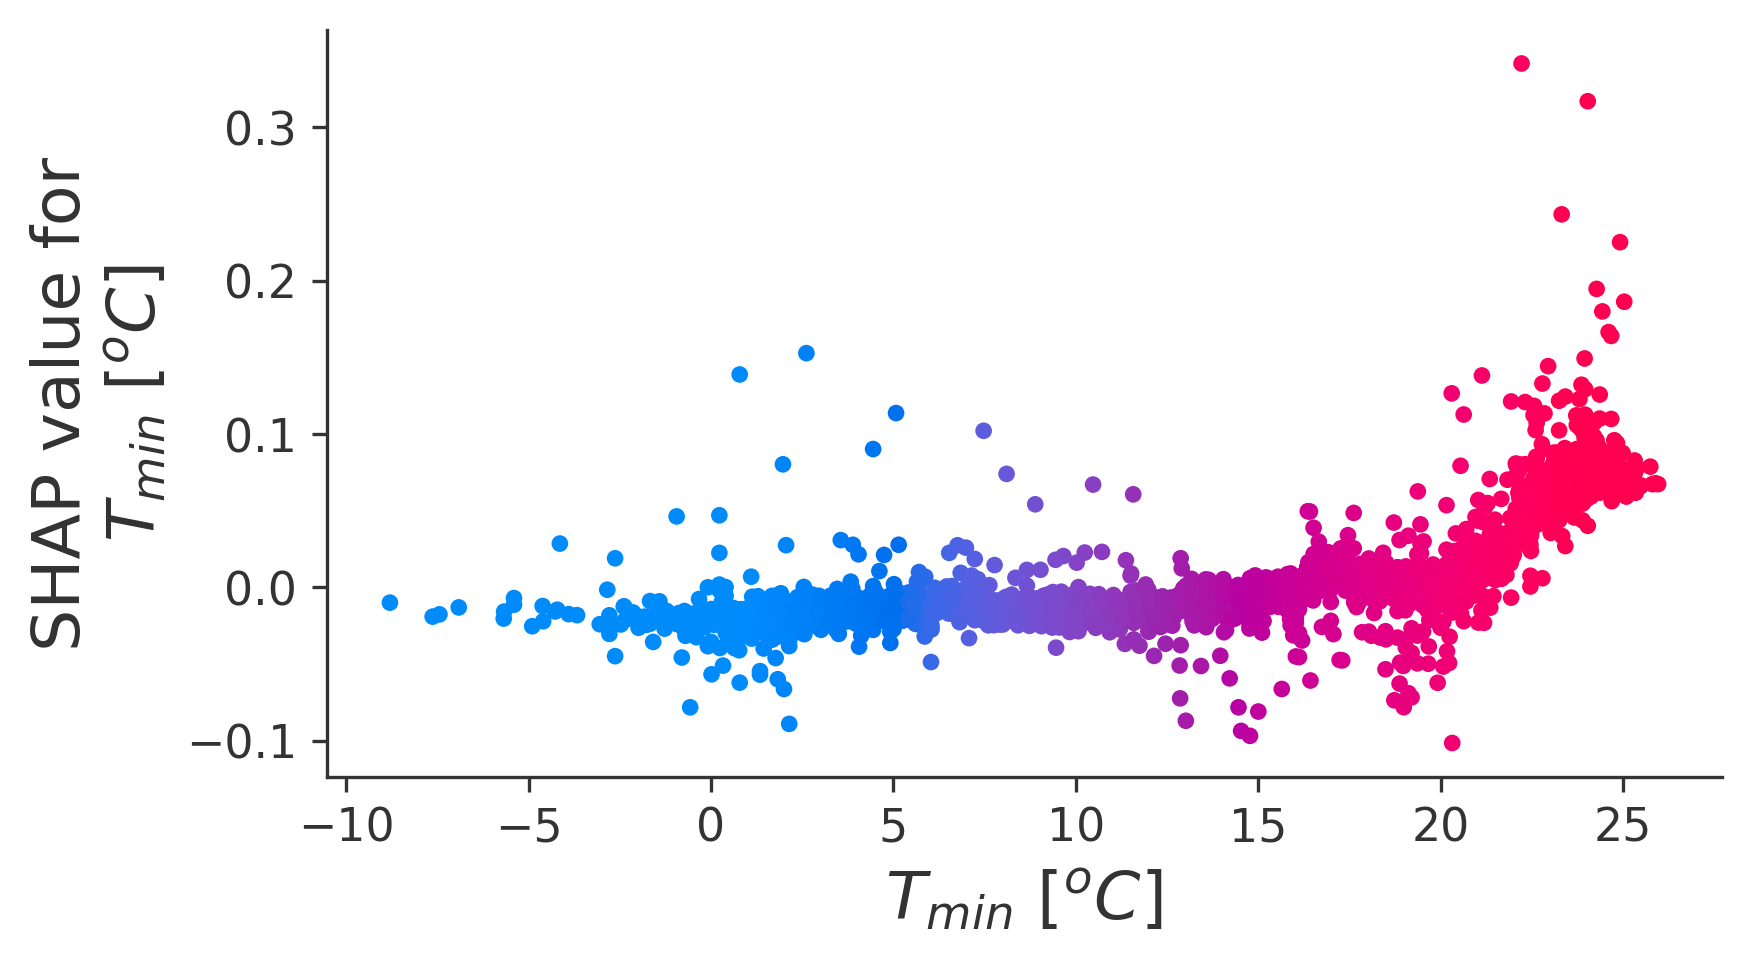

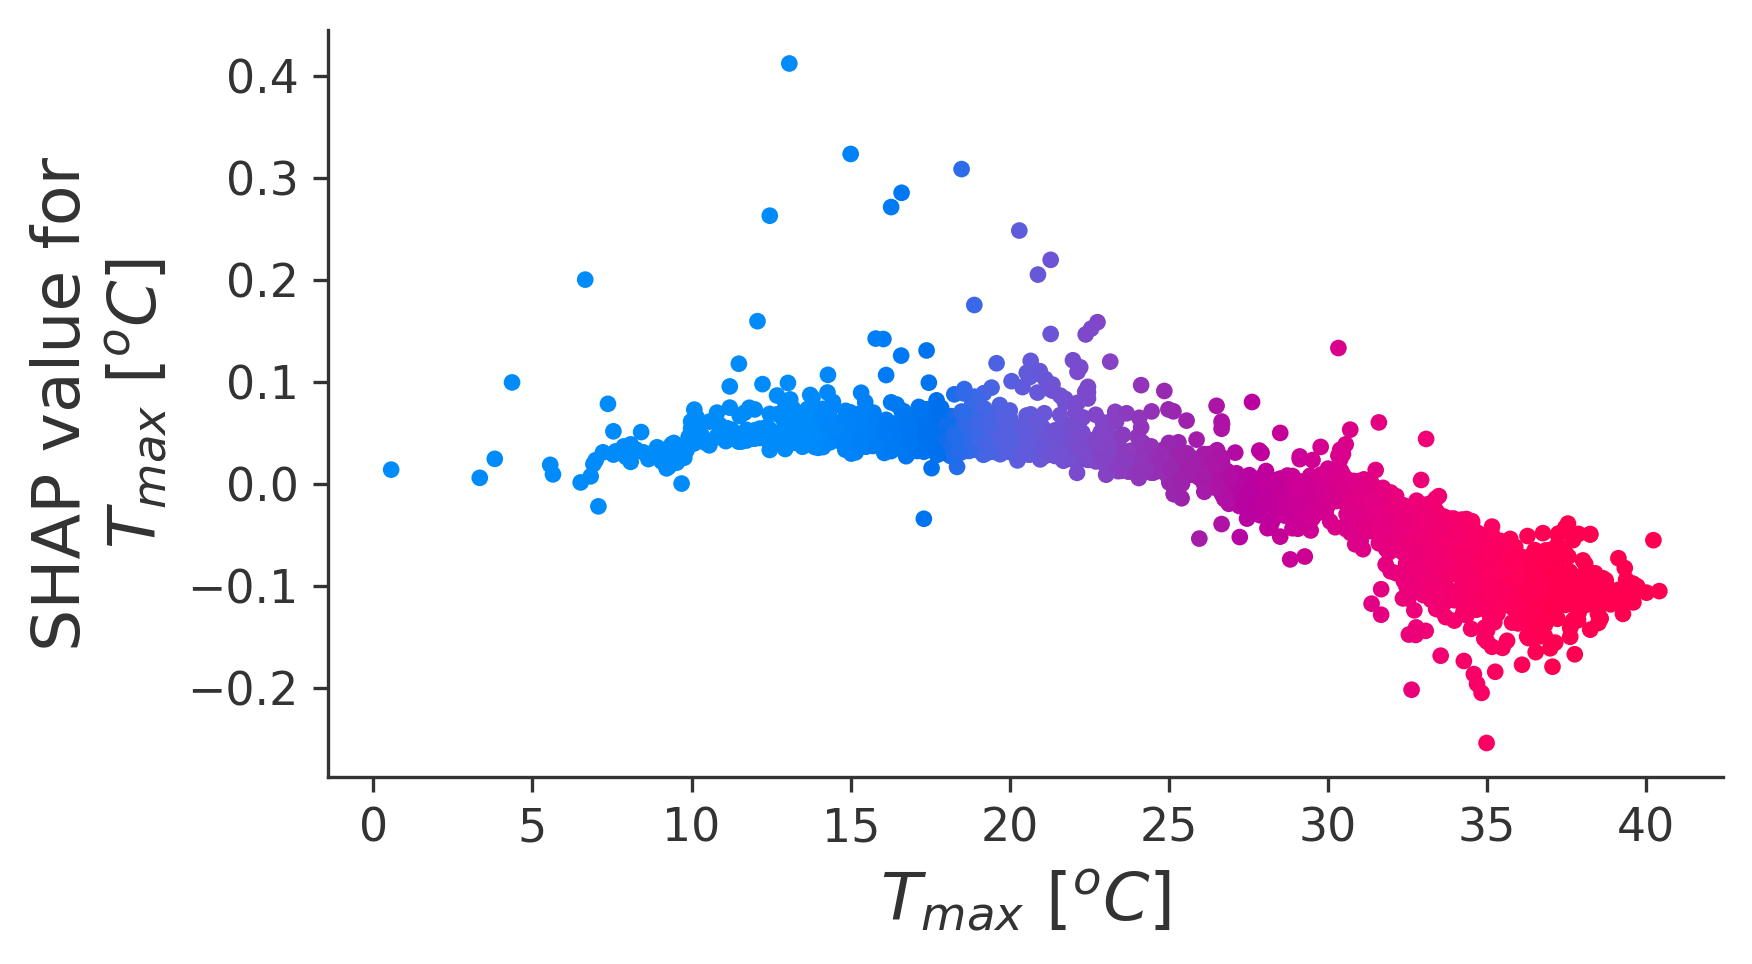

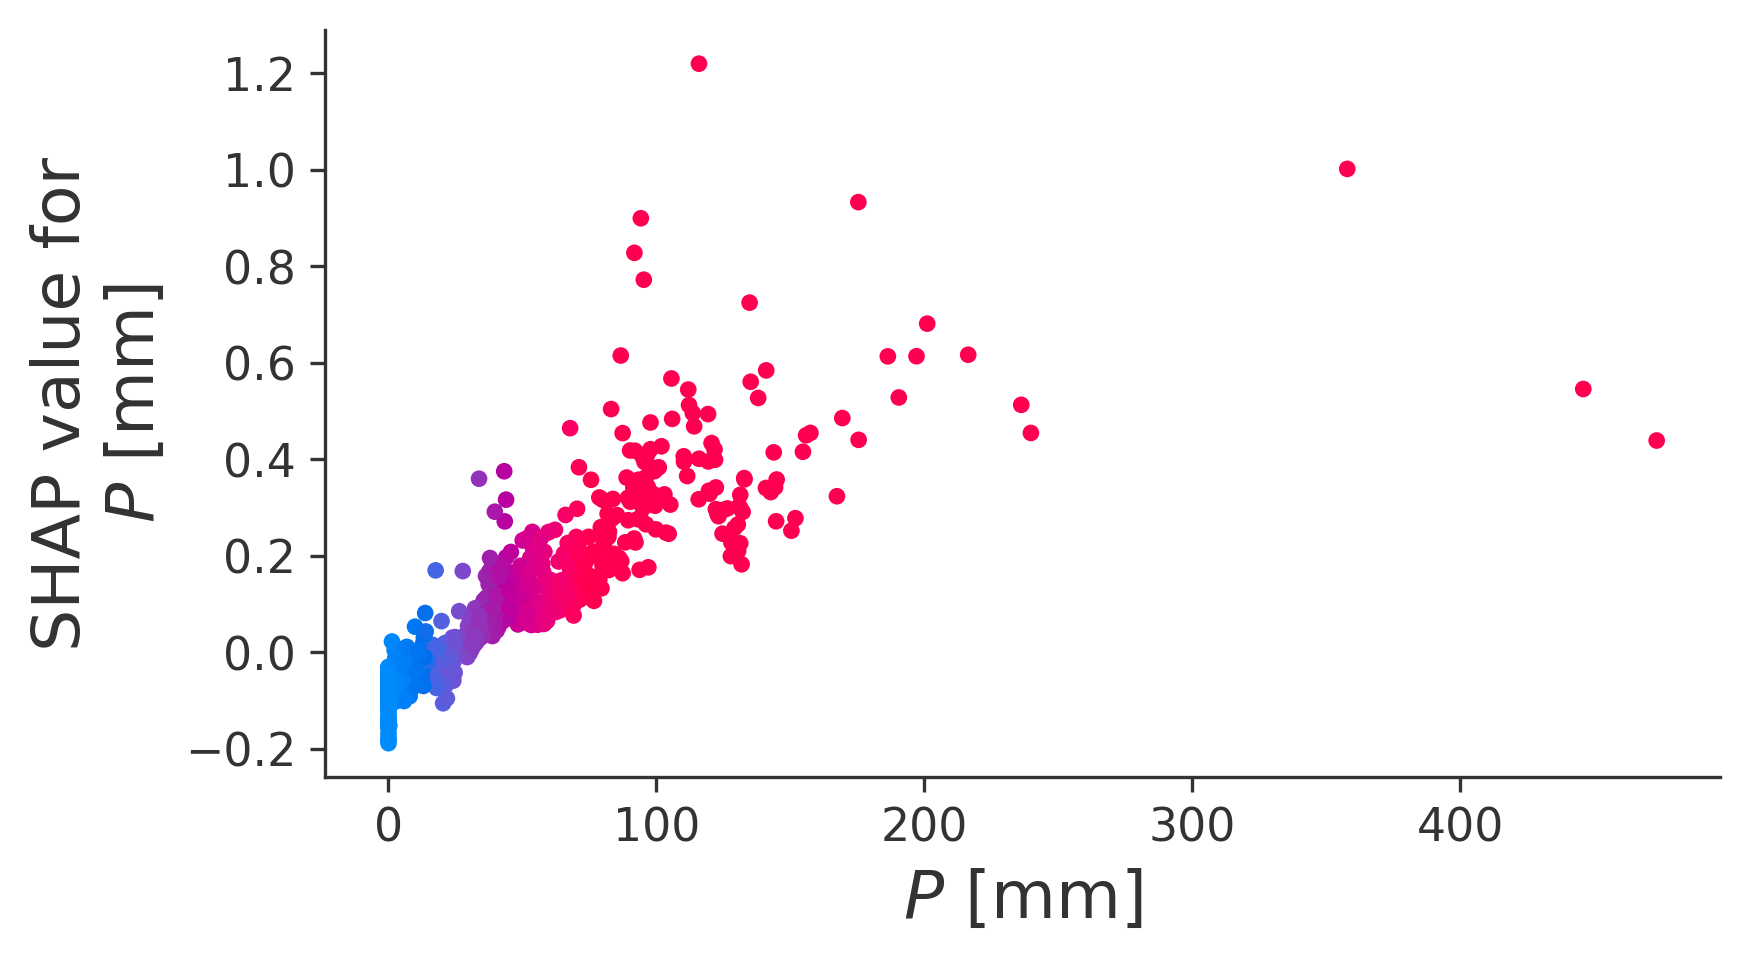

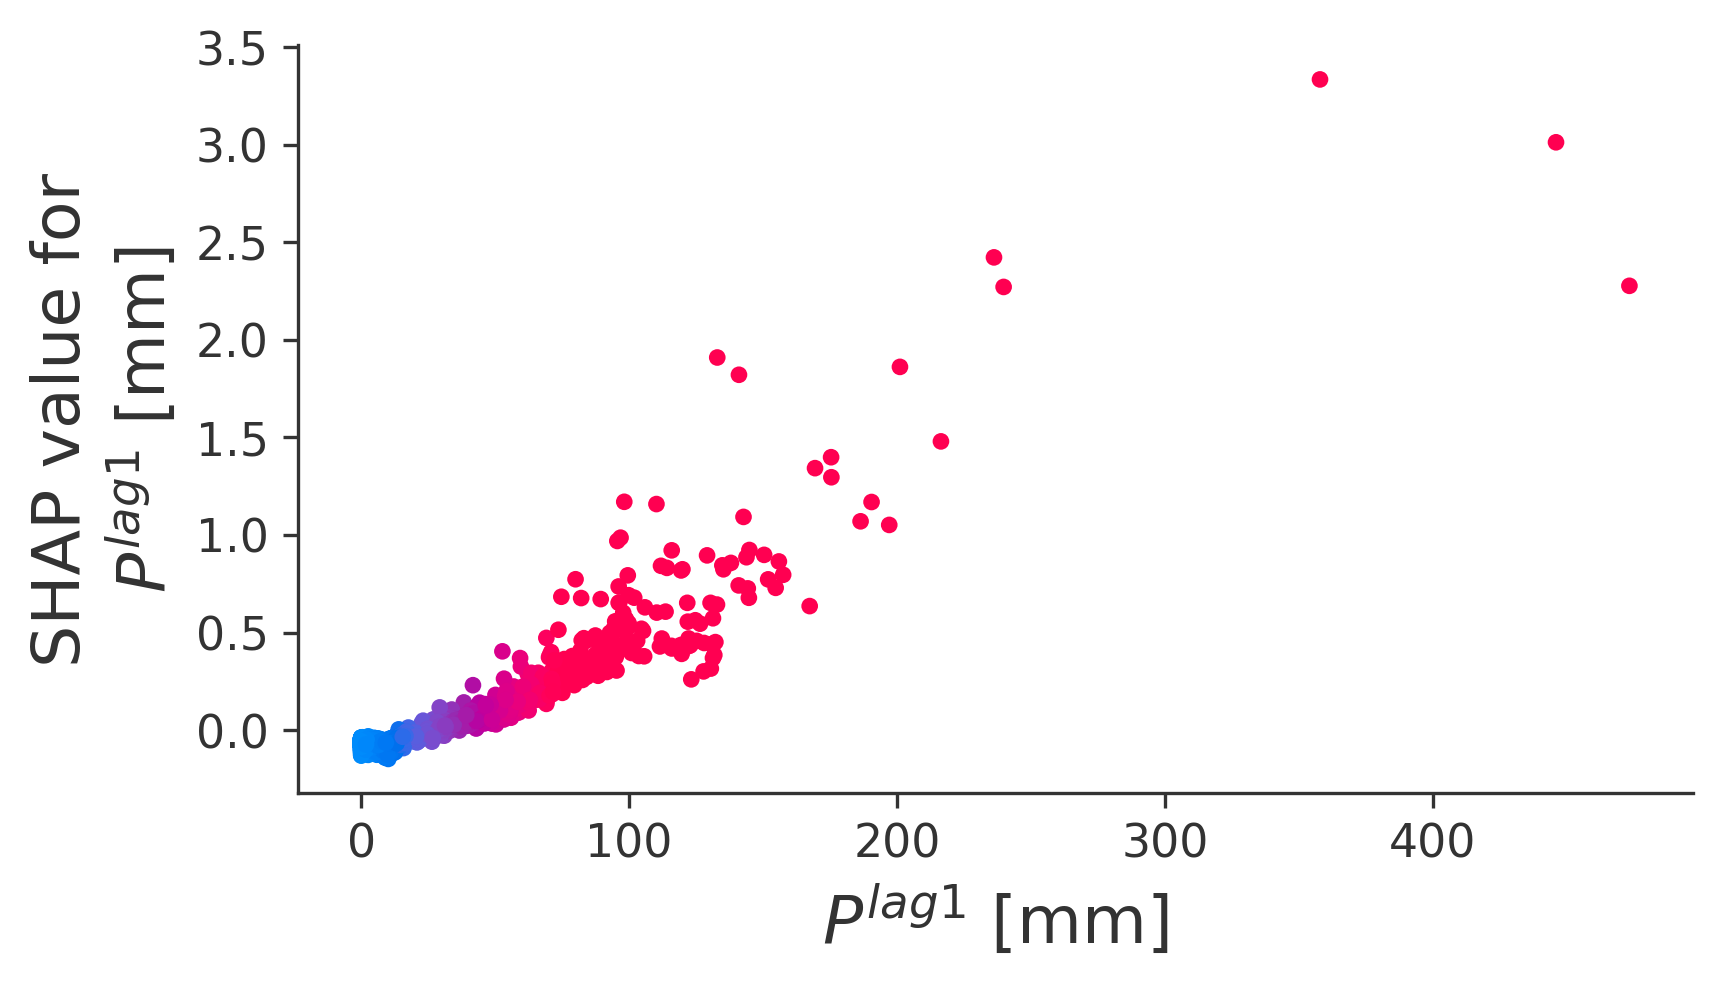

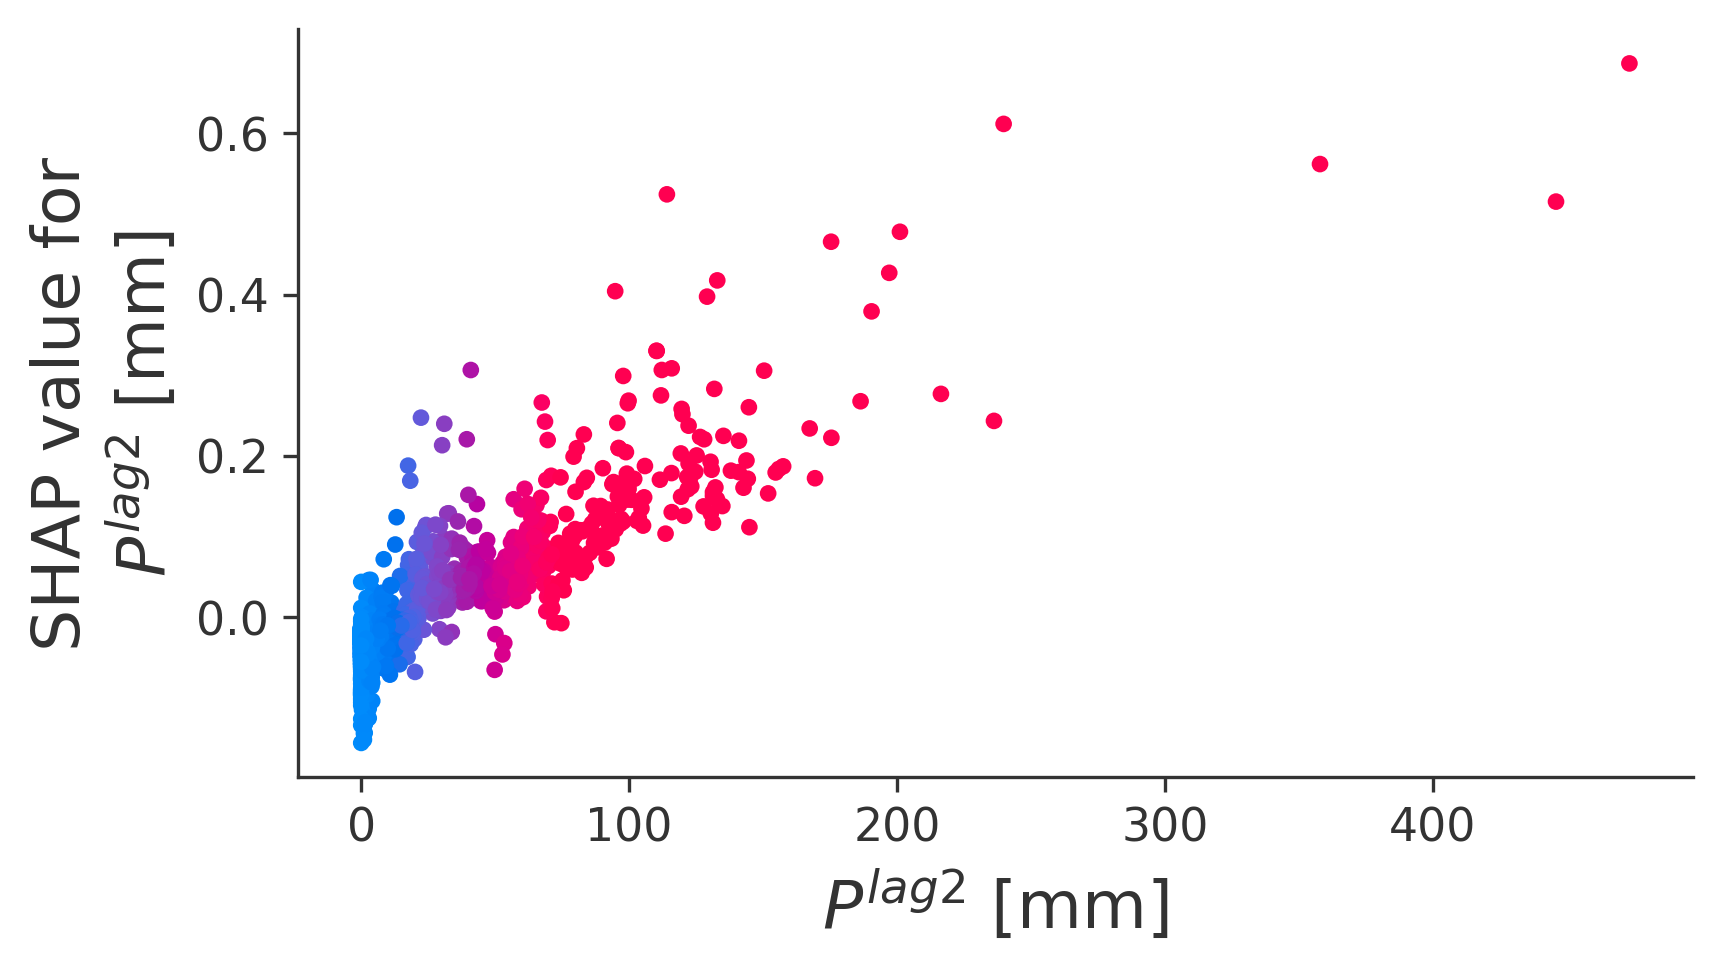

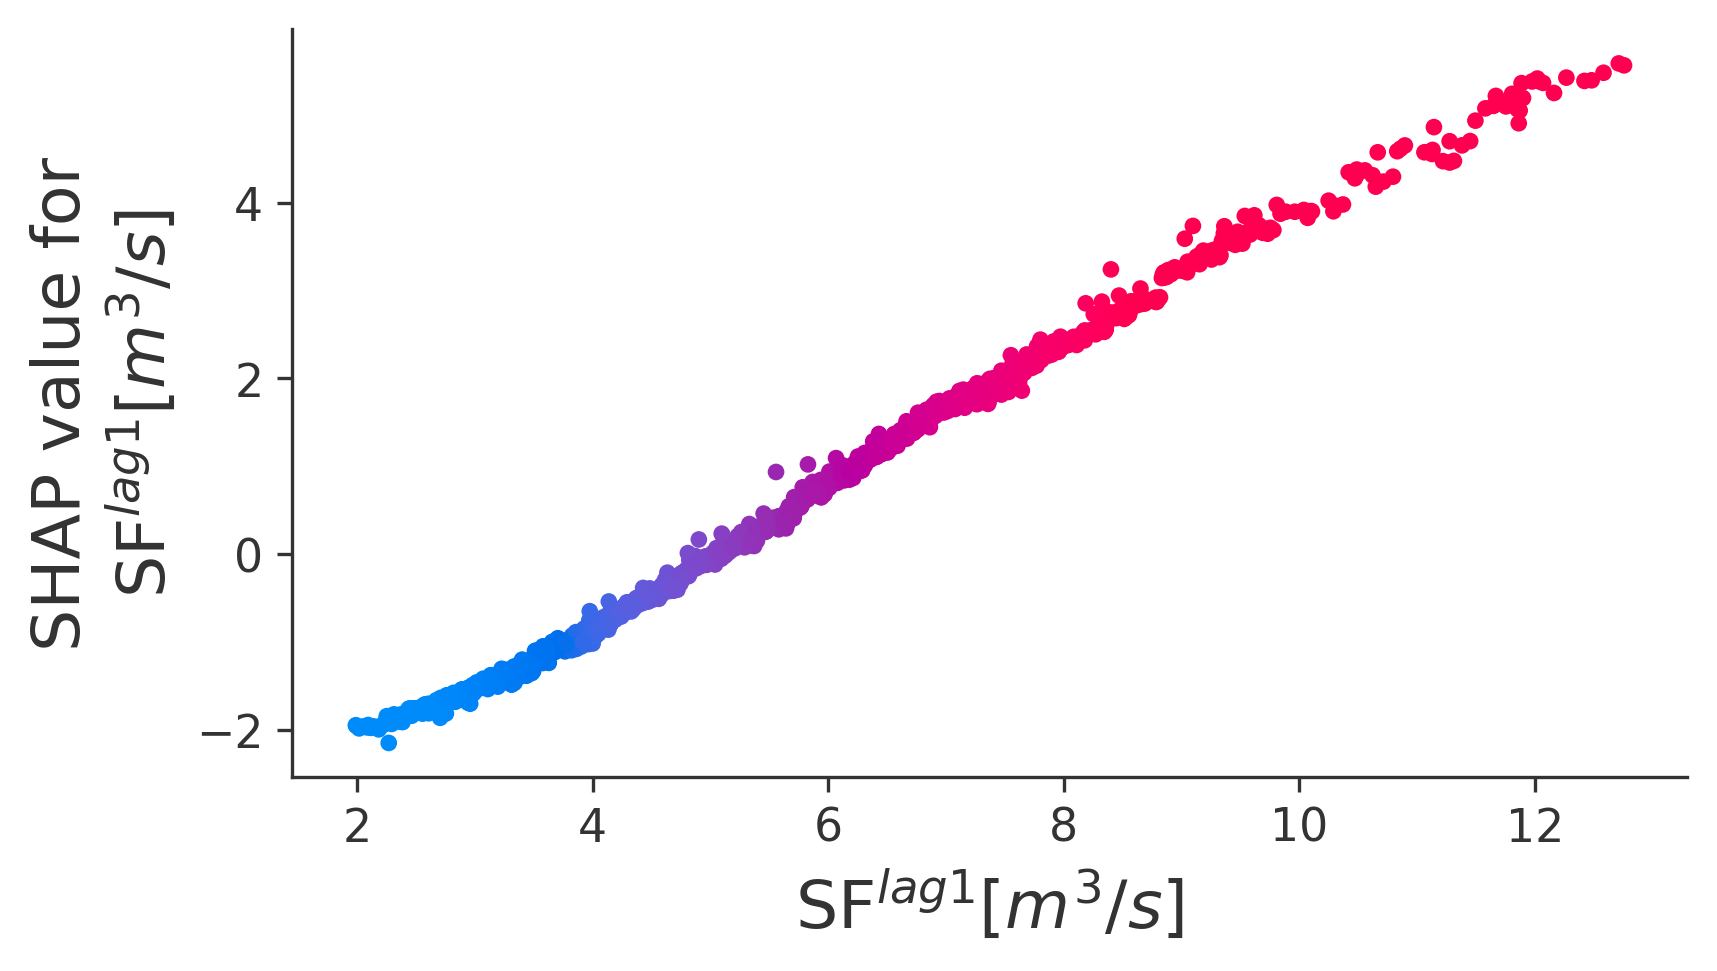

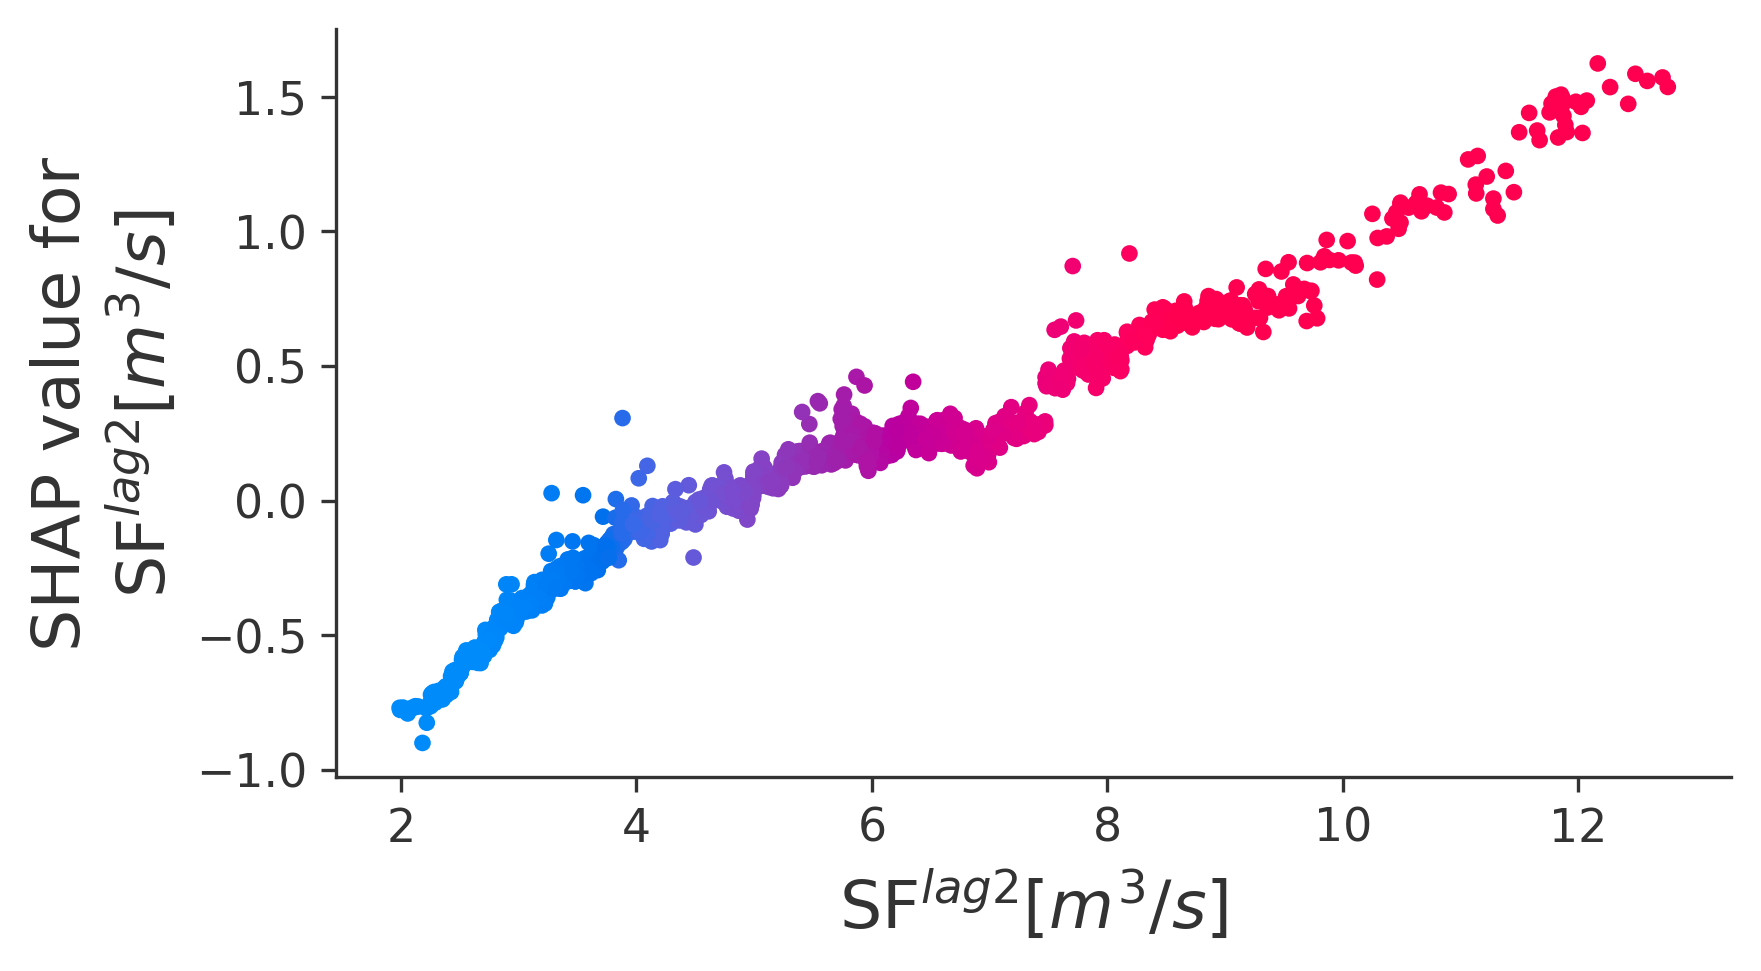

In [22]:
Features_= save_all_features(Features,save_features)

# Climate change analysis

## RCP 4.5

############ Model Validation set Accuracy RCP 4.5###########
MAE: 0.221 m/s^3
NSE: 0.974
RMS: 0.292 m/s^3
R-squared: 0.974
########################################
 
########################################
 


,Month,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,6.521904,15.343484,27.573830,18.452928,5.309164
std,3.448643,7.615139,7.683025,30.495874,1.431868
min,1.000000,-13.247194,1.649962,0.000000,2.448073
25%,4.000000,9.014431,21.744034,1.113107,4.162095
50%,7.000000,16.297148,28.148388,6.930567,5.117410
75%,10.000000,22.475353,33.930487,23.021054,6.289075
max,12.000000,27.602197,46.927602,400.595908,11.125865


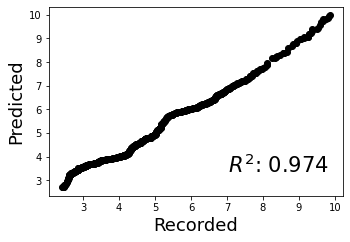

In [23]:
######## RCP(rcp_dataframe,df_AI, model, scenerio, save_to)
df_future_45= RCP(df_RCP45_MACA,df_AI,Model, 4.5, saveRCP_45)
df_future_45.describe()

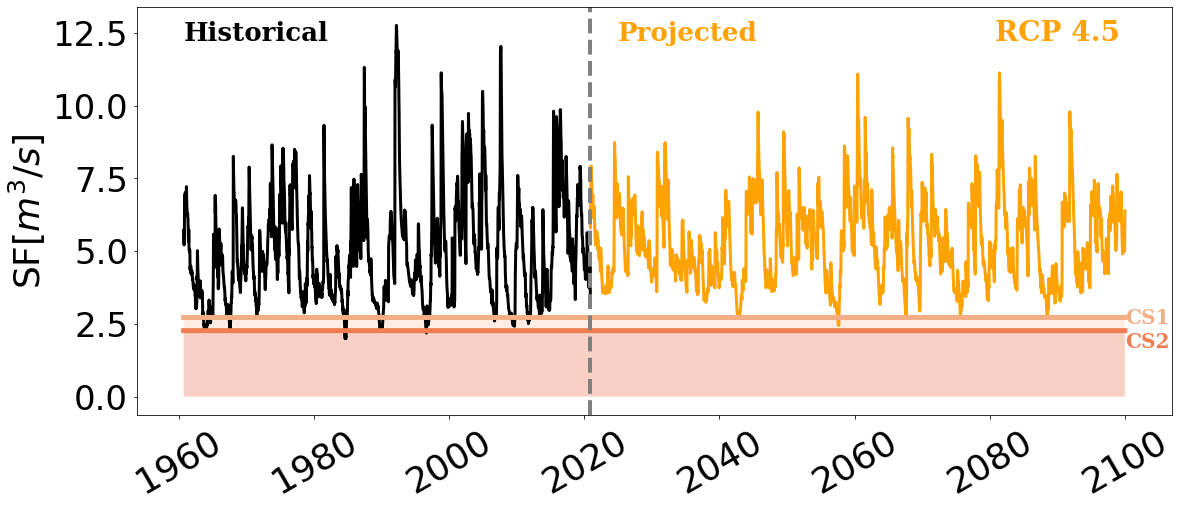

In [24]:
plot_projections(df_future_45,df_AI,4.5,saveRCP_45)

**Shapley global & local feature importance plot**

In [25]:
explainer = shap.TreeExplainer(Model)
shap_values = explainer.shap_values(df_future_45[Features].to_numpy())

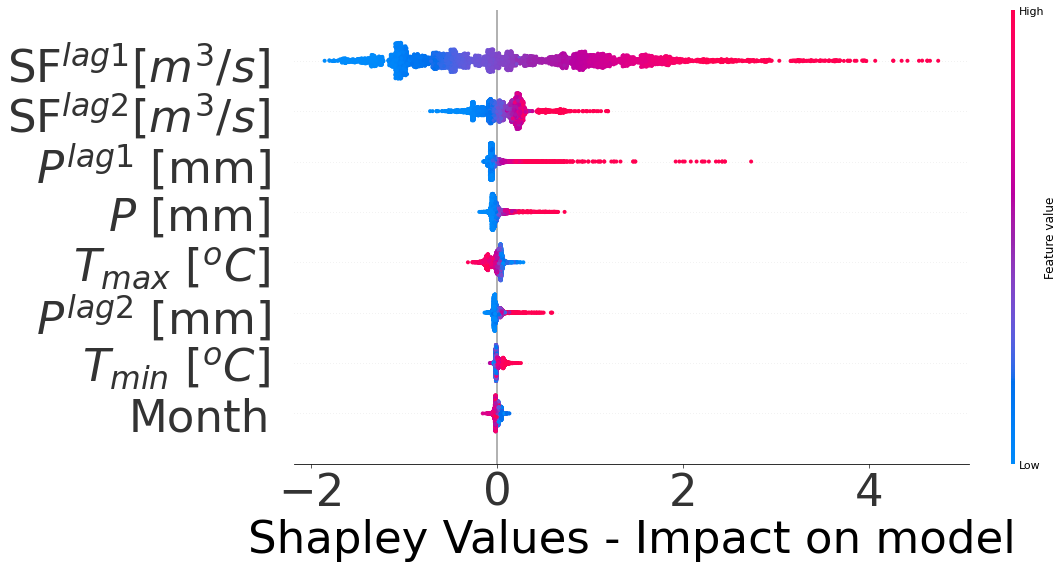

In [26]:
shap.summary_plot(shap_values,
                  df_future_45[Features].to_numpy(),
                  Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=45)
plt.tick_params(labelsize=45)
plt.tight_layout(pad=1.08)
plt.savefig(saveRCP_45+str('/SF - RCP45.pdf'), 
            format='pdf', dpi=300, bbox_inches ='tight')

**Collage of the top 4 important features according to shapley**

In [27]:
df_future_45.describe()
df_future_45.to_excel(saveRCP_45+str('/df_future_RCP45.xlsx'))

## Project 8.5

############ Model Validation set Accuracy RCP 8.5###########
MAE: 0.217 m/s^3
NSE: 0.976
RMS: 0.280 m/s^3
R-squared: 0.976
########################################
 
########################################
 


,Month,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,6.521904,16.379247,28.569190,17.645703,4.850706
std,3.448643,7.631918,8.008655,28.773308,1.352304
min,1.000000,-5.535311,-2.486796,0.000000,2.304622
25%,4.000000,10.060586,22.574082,0.954906,3.788408
50%,7.000000,17.371142,29.125358,6.595418,4.570738
75%,10.000000,23.460161,34.967030,21.590188,5.894792
max,12.000000,29.437982,46.867452,341.637357,10.125587


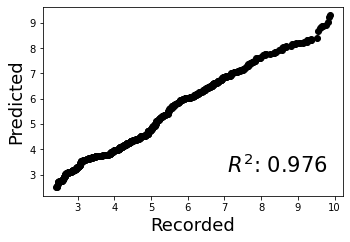

In [28]:
######## RCP(rcp_dataframe,df_AI, model, scenerio, save_to)

df_future_85= RCP(df_RCP85_MACA,df_AI,Model, 8.5, saveRCP_85)

df_future_85.describe()

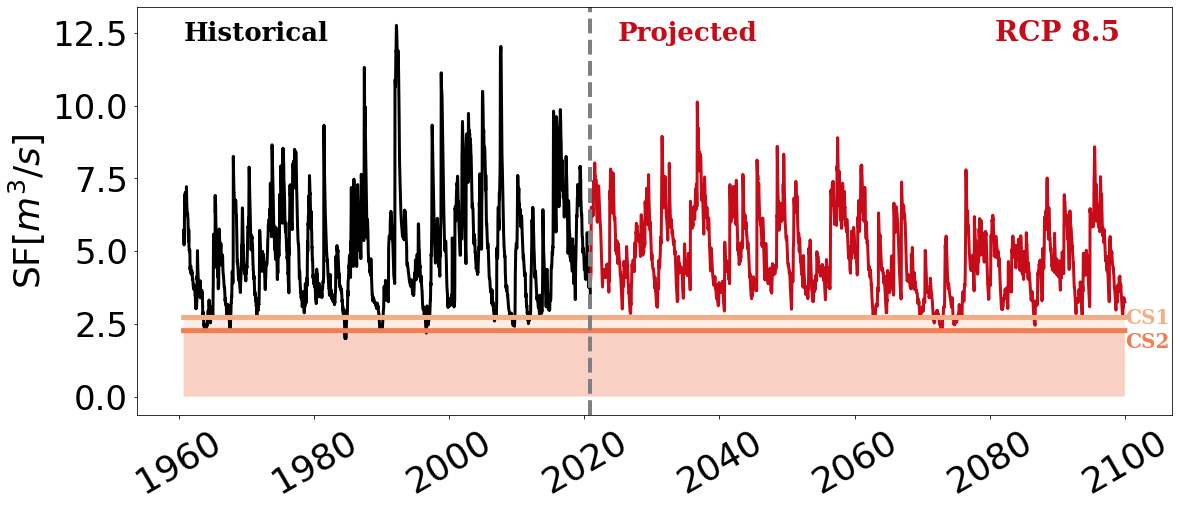

In [29]:
plot_projections(df_future_85,df_AI,8.5,saveRCP_85)

In [30]:
df_future_85.to_excel(saveRCP_85+str('/df_future_RCP85.xlsx'))

# Check the relationship with the evaportaion and soil moisture

In [31]:
df_read = df_AI.copy()

In [16]:

df_AI2 = pd.DataFrame()

df_AI2['$T_{min}$ [$^oC$]'] = df_read['$T_{min}$ [$^oC$]'].resample('M').mean()
df_AI2['$T_{max}$ [$^oC$]'] = df_read['$T_{max}$ [$^oC$]'].resample('M').mean()
df_AI2['$P$ [mm]'] = df_read['$P$ [mm]'].resample('M').sum()


df_AI2 = (df_AI2[(df_AI2.index >= '1960-09-01')& (df_AI2.index <= Approved_date)])

df_AI2

NameError: name 'df_read' is not defined

In [19]:
TErraclimate = pd.read_csv(os.getcwd()+r'/Input/terraclimate.csv',
                           skiprows=13, usecols= ['aet(mm)','soil(mm)'])

TErraclimate=TErraclimate.rename(columns = {"aet(mm)":"$ET$ [mm]", 'soil(mm)': '$SM$ [mm]'})


TErraclimate  =TErraclimate.iloc[32:,:]
TErraclimate = TErraclimate.iloc[:-2,:]

TErraclimate

,$ET$ [mm],$SM$ [mm]
32,24.9,23.4
33,114.8,133.2
34,66.4,121.1
35,65.1,152.1
36,45.9,137.7
...,...,...
749,91.3,16.6
750,40.4,15.5
751,12.1,14.6
752,141.1,80.7


In [34]:
SF_Terraclimate = Sf_data.resample('M').mean()

SF_Terraclimate = (SF_Terraclimate[(SF_Terraclimate.index>= '1960-09-30')& (SF_Terraclimate.index<= '2020-10-31')])

SF_Terraclimate


,SF$[m^3/s]$
Date,
1960-09-30,5.721767
1960-10-31,5.400968
1960-11-30,6.761767
1960-12-31,6.845935
1961-01-31,6.729097
...,...
2020-06-30,5.414233
2020-07-31,4.772710
2020-08-31,3.947000


In [35]:
df_AI2 = pd.concat([df_AI2,SF_Terraclimate],axis=1)


In [36]:
#df_AI['$R_w$ [mm]'] = df_AI['$R_w$ [mm]'].to_numpy()
df_AI2['$SM$ [mm]'] = TErraclimate['$SM$ [mm]'].to_numpy()
df_AI2['$ET$ [mm]'] = TErraclimate['$ET$ [mm]'].to_numpy()
df_AI2.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$,$SM$ [mm],$ET$ [mm]
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,13.562576,26.464571,75.665111,4.998356,62.911496,68.299169
std,7.193569,6.970855,71.998064,1.847586,51.354399,38.025257
min,-1.436429,10.310714,0.000000,2.043367,8.100000,1.200000
25%,6.887500,20.466964,25.242006,3.559840,23.700000,40.800000
50%,13.870000,27.163929,57.300000,4.658229,45.450000,62.050000
75%,20.563214,32.646429,101.275000,6.049533,89.475000,91.750000
max,25.360714,39.421429,642.000000,12.611161,251.300000,182.800000


In [37]:
# Pumping patterns is hypothesized to be associated with the month
df_AI2['Month'] = df_AI2.index.month 

# There could be some lag effects in the hydroclimatic behavior for Karst aquifers
df_AI2['$T_{max}^{lag1}$ [$^oC$]'] = df_AI2['$T_{max}$ [$^oC$]'].shift(1)
df_AI2['$T_{max}^{lag2}$ [$^oC$]'] = df_AI2['$T_{max}$ [$^oC$]'].shift(2)

df_AI2['$T_{min}^{lag1}$ [$^oC$]'] = df_AI2['$T_{min}$ [$^oC$]'].shift(1)
df_AI2['$T_{min}^{lag2}$ [$^oC$]'] = df_AI2['$T_{min}$ [$^oC$]'].shift(2)

df_AI2['$P^{lag1}$ [mm]'] = df_AI2['$P$ [mm]'].shift(1)
df_AI2['$P^{lag2}$ [mm]'] = df_AI2['$P$ [mm]'].shift(2)

df_AI2['SF$^{lag1} [m^3/s]$'] = df_AI2['SF$[m^3/s]$'].shift(1)
df_AI2['SF$^{lag2} [m^3/s]$'] = df_AI2['SF$[m^3/s]$'].shift(2)

df_AI2.dropna(inplace=True)


In [38]:

Features = ['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
            '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]','$SM$ [mm]','$ET$ [mm]',
            'SF$^{lag1} [m^3/s]$','SF$^{lag2} [m^3/s]$']

#SpringFlow for Comal = Target
Target = ['SF$[m^3/s]$']


#Take the tain set till 2005 and test set from 2006 till 2020

df_AI2_Train = df_AI2[:'2005-12-31']
df_AI2_Test = df_AI2['2006-01-01':]

#Create Independent and dependent variable for machine learning
X = df_AI2[Features].to_numpy()
Y = df_AI2[Target].to_numpy()
test_X = df_AI2_Test[Features].iloc[0].to_numpy().reshape(1, -1)

In [39]:
train_X = df_AI2_Train[Features].to_numpy()
y_train = df_AI2_Train[Target].to_numpy()

Model = CatBoostRegressor()
Model = Model.fit(train_X, y_train)

RMS = np.sqrt(mean_squared_error(y_train,Model.predict(train_X)))
RSQ = r2_score(y_train,Model.predict(train_X))
MAE = np.mean(np.abs((y_train -Model.predict(train_X)))) 
NSEe = NSE(Model.predict(train_X),y_train)


print("############ Model Accuracy -Training set ############")
print("MAE: %0.3f" % MAE,'m/s^3')
print("NSE: %0.3f" % NSEe)
print("RMS: %0.3f" % RMS, 'm/s^3')
print("R-squared: %0.3f" % RSQ)
print("########################################")
print(" ")


Learning rate set to 0.037166
0:	learn: 1.7801494	total: 1.02ms	remaining: 1.02s
1:	learn: 1.7332035	total: 1.93ms	remaining: 963ms
2:	learn: 1.6922304	total: 2.54ms	remaining: 846ms
3:	learn: 1.6515332	total: 3.35ms	remaining: 835ms
4:	learn: 1.6172081	total: 4.15ms	remaining: 825ms
5:	learn: 1.5823813	total: 5.03ms	remaining: 833ms
6:	learn: 1.5482573	total: 5.88ms	remaining: 835ms
7:	learn: 1.5134604	total: 6.8ms	remaining: 843ms
8:	learn: 1.4791732	total: 7.66ms	remaining: 844ms
9:	learn: 1.4446862	total: 8.53ms	remaining: 845ms
10:	learn: 1.4108085	total: 9.39ms	remaining: 844ms
11:	learn: 1.3791888	total: 10.4ms	remaining: 855ms
12:	learn: 1.3463524	total: 11.4ms	remaining: 864ms
13:	learn: 1.3160448	total: 12.3ms	remaining: 869ms
14:	learn: 1.2889504	total: 15ms	remaining: 985ms
15:	learn: 1.2617201	total: 16.3ms	remaining: 1s
16:	learn: 1.2352378	total: 17.4ms	remaining: 1.01s
17:	learn: 1.2058512	total: 18.3ms	remaining: 997ms
18:	learn: 1.1811626	total: 19.1ms	remaining: 987m

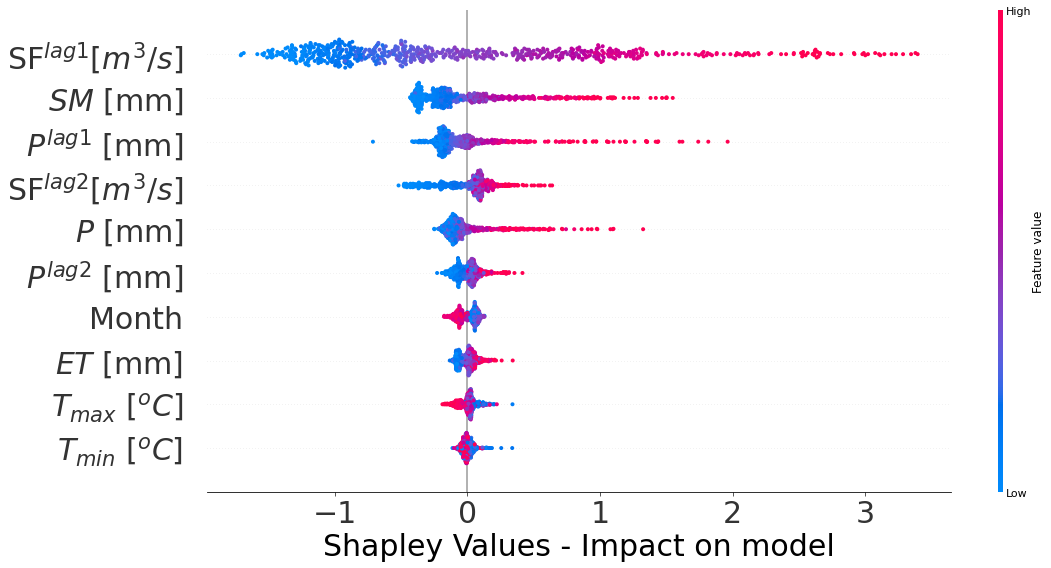

In [40]:
explainer = shap.TreeExplainer(Model)
shap_values = explainer.shap_values(df_AI2[Features].to_numpy())

shap.summary_plot(shap_values, df_AI2[Features].to_numpy(), Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(save_Model +str('/Feature Importance ET-SM- SF.pdf'), format='pdf', dpi=300, bbox_inches ='tight')

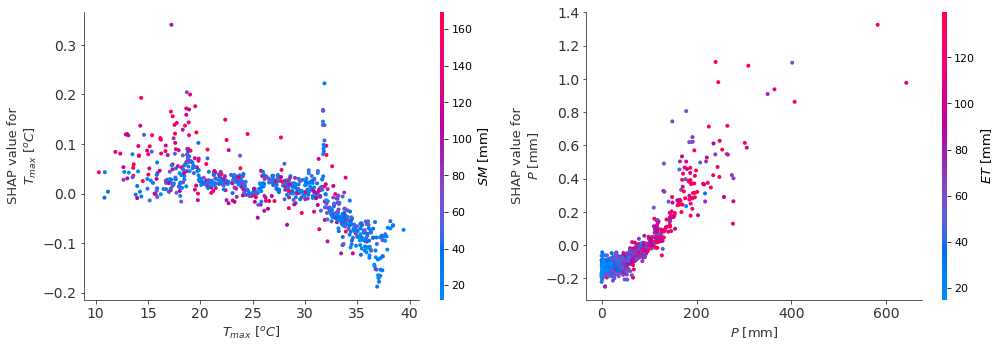

In [41]:
fig = plt.figure(figsize=(16,5),)
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
   
shap.dependence_plot('$T_{max}$ [$^oC$]', shap_values, df_AI2[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$SM$ [mm]')
plt.tick_params(labelsize=14)

ax2 = fig.add_subplot(gs[0,1])
shap.dependence_plot('$P$ [mm]',shap_values, df_AI2[Features].to_numpy(),Features, ax=ax2, show=False,
                     interaction_index='$ET$ [mm]')
plt.tick_params(labelsize=14)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.9)

#plt.subplot_tool()

plt.savefig(save_Model +str('/Feature Importance ET-P__T-SM.pdf'), format='pdf', dpi=300, bbox_inches ='tight')

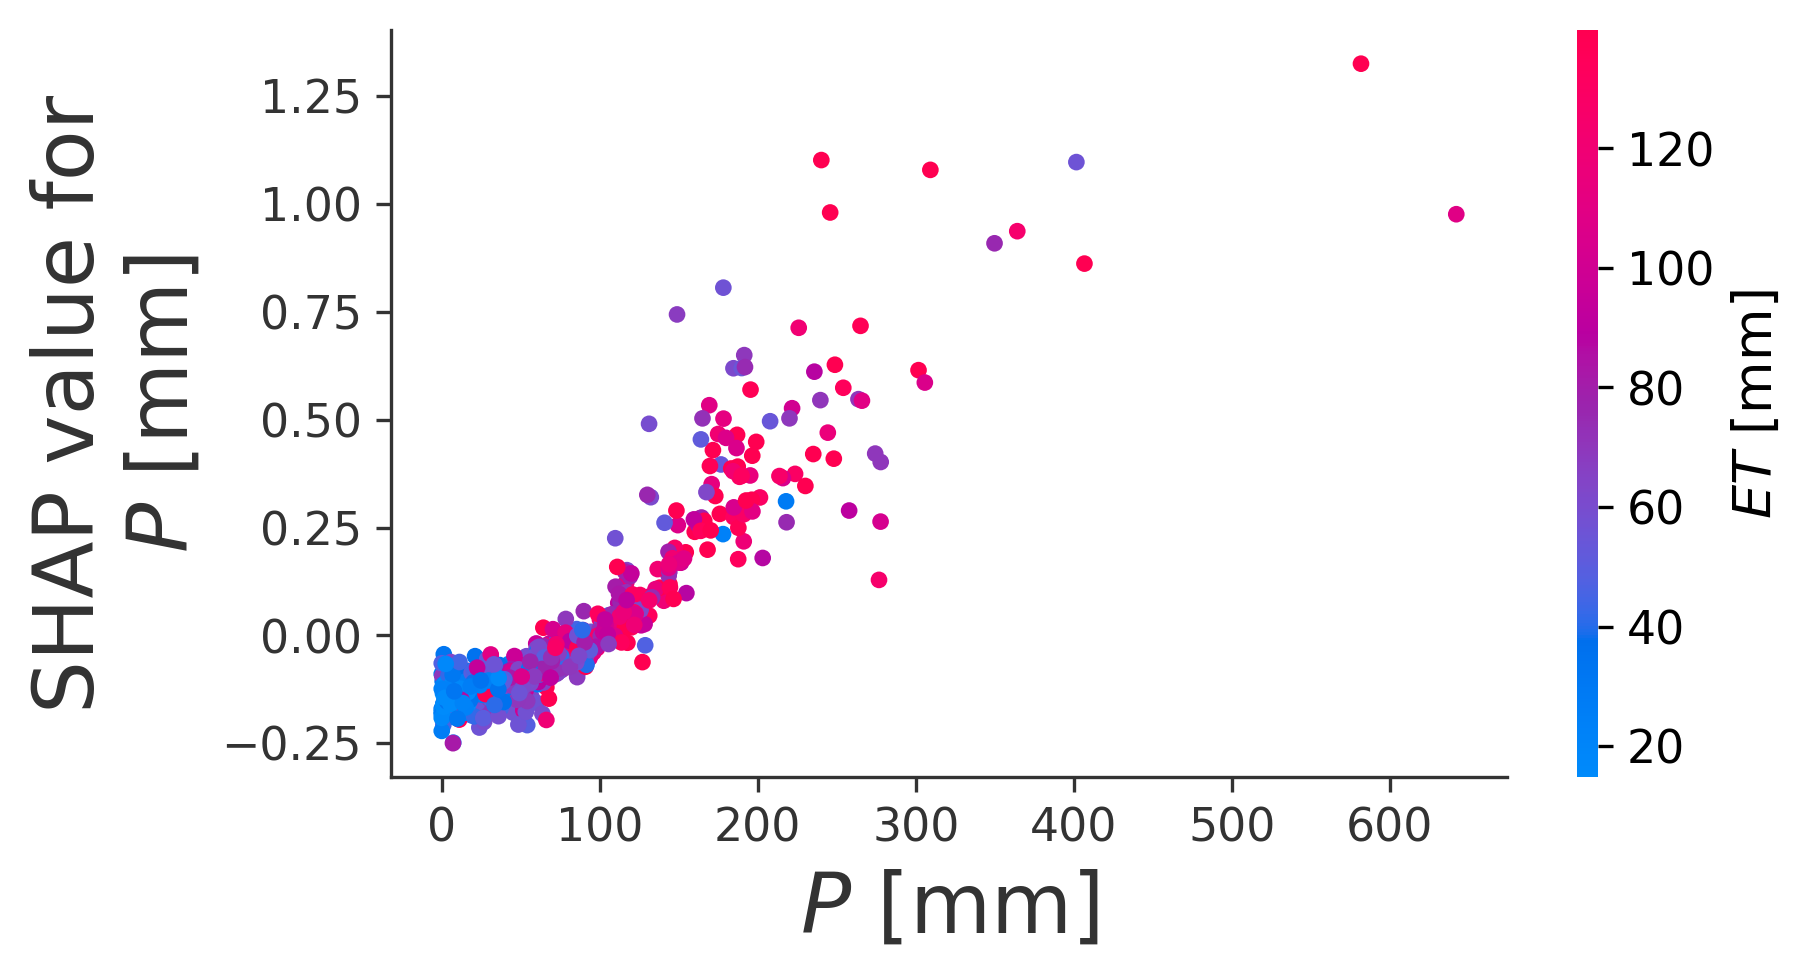

In [42]:
fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('$P$ [mm]',shap_values, df_AI2[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$ET$ [mm]')
plt.ylabel('SHAP value for'+'\n'+'$P$ [mm]',fontsize = 20)
plt.xlabel('$P$ [mm]',fontsize = 20)

plt.savefig(save_Model +str('/Feature Interaction_ - Pr-ET2 -Comal Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


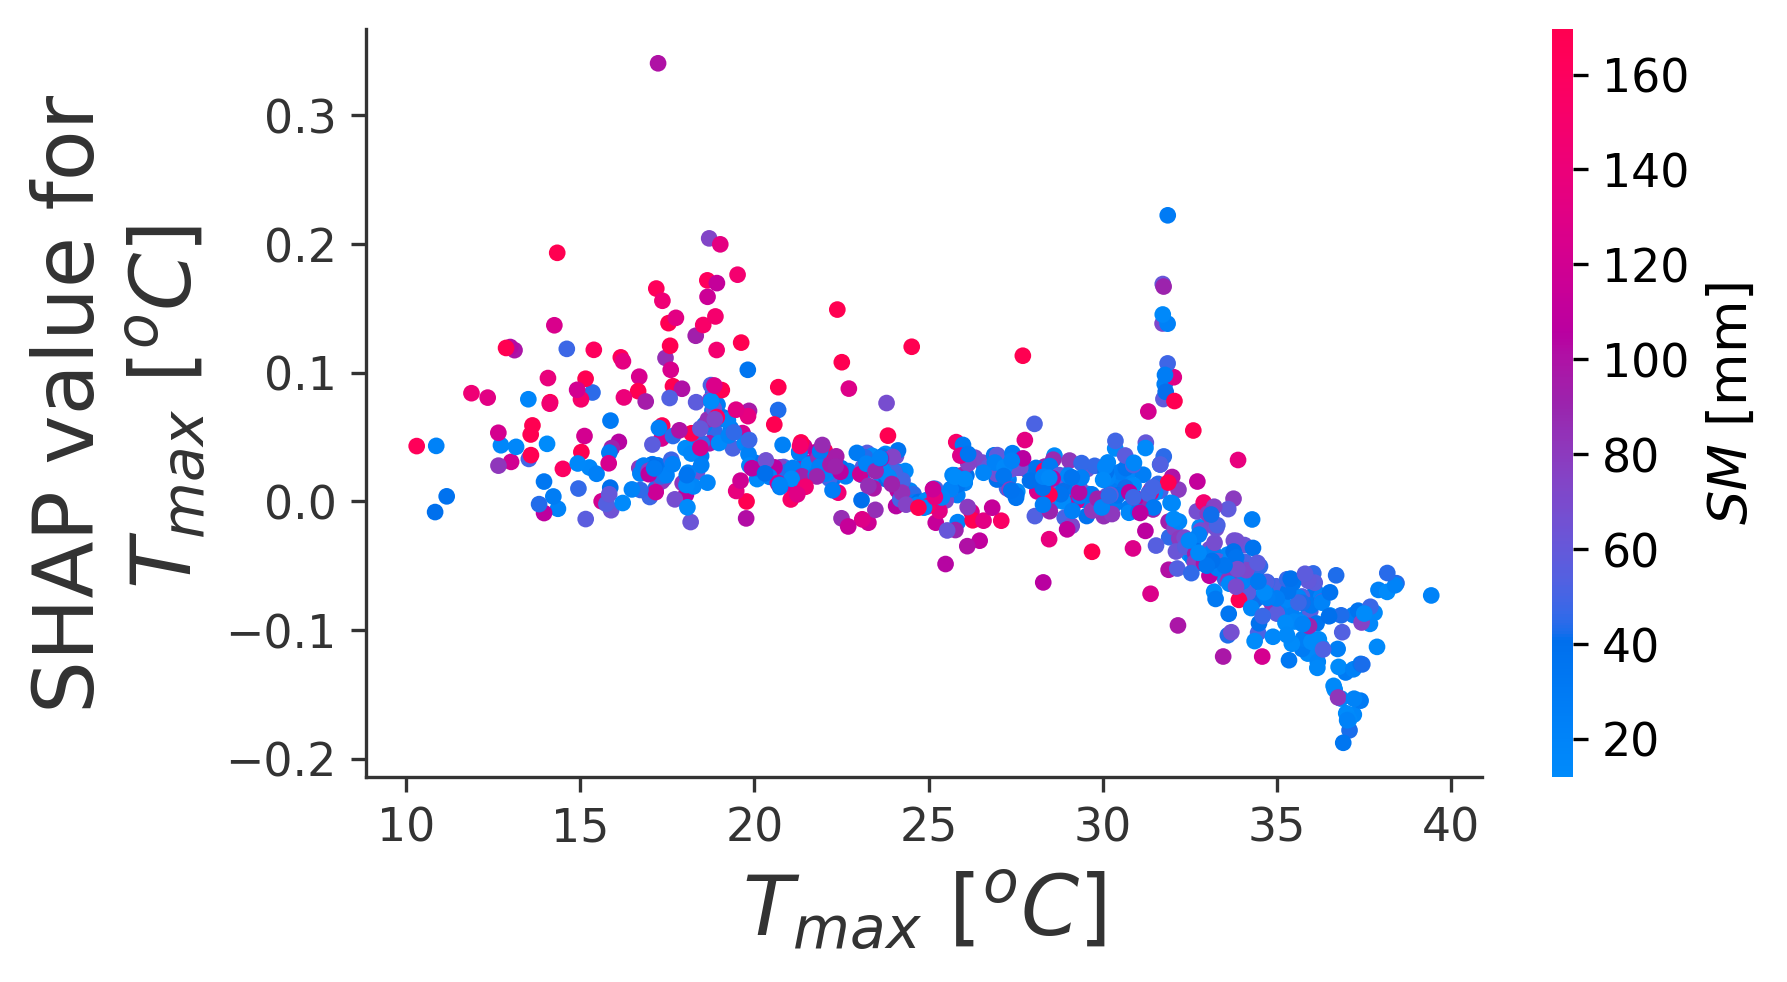

In [43]:

fig = plt.figure(figsize=(6,3.3),dpi=300)
ax1 = fig.add_subplot(1,1,1)

   
shap.dependence_plot('$T_{max}$ [$^oC$]', shap_values, df_AI2[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$SM$ [mm]')
plt.ylabel('SHAP value for'+'\n'+'$T_{max}$ [$^oC$] ',fontsize = 20)
plt.xlabel('$T_{max}$ [$^oC$]',fontsize = 20)



plt.savefig(save_Model +str('/Feature Interaction - Tmax2 - Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


In [44]:
Model